In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
df = pd.read_csv('.\cardata.csv')
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3654,3654,Maruti Ritz LDi,Bangalore,2016,120000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0,NaN,3.65
2466,2466,BMW X3 xDrive20d,Pune,2012,108000,Diesel,Automatic,First,16.09 kmpl,1995 CC,184 bhp,5.0,NaN,17.50
3248,3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,NaN,3.32
2875,2875,Honda Amaze SX i-DTEC,Kochi,2016,51806,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,5.40
2910,2910,Toyota Innova 2.5 V Diesel 8-seater,Hyderabad,2009,135000,Diesel,Manual,Second,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,8.20


In [79]:
df.shape

(6019, 14)

##### This dataset contain 6019 rows and 26 columns.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [81]:
df.isna().sum() / len(df.index) * 100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

##### New_Price columns contain large number of missing values. I'll drop this column.

In [82]:
df = df.drop(columns = 'New_Price', axis = 1)
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4975,4975,Maruti Ciaz ZXi,Coimbatore,2016,41810,Petrol,Manual,First,20.73 kmpl,1373 CC,91.1 bhp,5.0,7.11
4549,4549,Toyota Fortuner TRD Sportivo 2.8 2WD AT,Kochi,2014,56501,Diesel,Automatic,First,12.9 kmpl,2755 CC,174.5 bhp,7.0,17.71
870,870,Hyundai Creta 1.6 VTVT S,Coimbatore,2016,47016,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,9.43
3227,3227,Hyundai Verna SX CRDi AT,Hyderabad,2011,104000,Diesel,Automatic,First,19.08 kmpl,1582 CC,126.32 bhp,5.0,5.75
4901,4901,Honda Brio S MT,Jaipur,2015,46650,Petrol,Manual,First,19.4 kmpl,1198 CC,86.8 bhp,5.0,4.25


##### Let remove units in the Mileage, Engine, Power columns and convert it into float type.

In [83]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0]
df['Engine'] = df['Engine'].str.split(expand=True)[0]
df['Power'] = df['Power'].str.split(expand=True)[0]
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4950,4950,Ford Aspire Titanium Diesel,Kolkata,2017,60048,Diesel,Manual,First,26.1,1498,99,5.0,6.00
3275,3275,Mahindra XUV500 W8 2WD,Chennai,2011,126000,Diesel,Manual,Third,16.0,2179,140,7.0,6.70
4335,4335,Volkswagen Vento Diesel Comfortline,Kochi,2014,52400,Diesel,Manual,First,20.54,1598,103.6,5.0,5.36
4117,4117,Audi Q5 30 TDI quattro Premium Plus,Bangalore,2015,63000,Diesel,Automatic,First,14.16,1968,174.3,5.0,36.00
2279,2279,Mahindra Ssangyong Rexton RX7,Kochi,2015,67415,Diesel,Automatic,First,11.18,2696,184,7.0,11.03


In [84]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors= 'coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors= 'coerce')
df['Power'] = pd.to_numeric(df['Power'], errors= 'coerce')

In [85]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [86]:
df.isna().sum() / len(df.index) * 100

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                2.375810
Seats                0.697790
Price                0.000000
dtype: float64

##### There are missing values in the Mileage, Engine, Power, Seats columns. Now we replace these missing values with mean value of the column.

In [87]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace = True)
df['Engine'].fillna(df['Engine'].mean(), inplace = True)
df['Power'].fillna(df['Power'].mean(), inplace = True)
df['Seats'].fillna(df['Seats'].mean(), inplace = True)

df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

##### Now there are no missing values in that dataset.

In [88]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [89]:
df.duplicated().sum()

0

##### There are no duplicate values in this dataset

### Price column

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Car Price Distribution Plot')

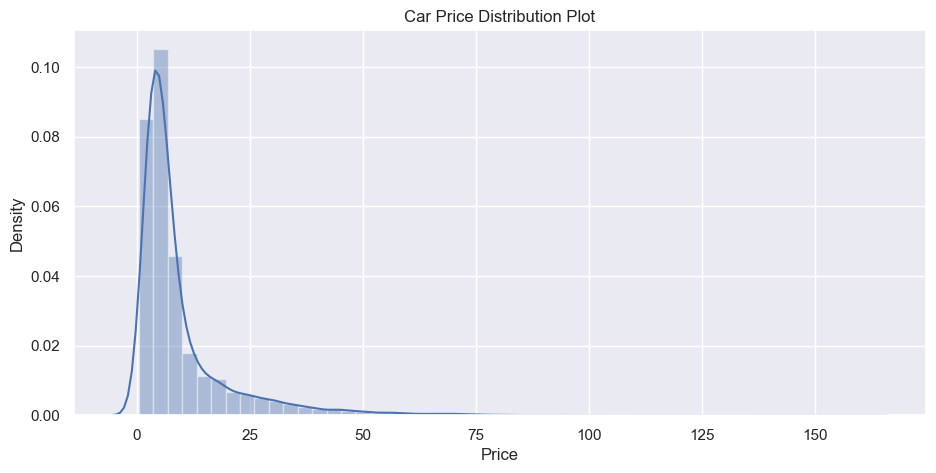

In [90]:
sns.set()
plt.figure(figsize=[11,5])
sns.distplot(df['Price'])
plt.title('Car Price Distribution Plot')

###### There are much fewer outliers
###### Let transform 'Price' with a log transformation.

In [91]:
df['Price'] = np.log(df['Price'])

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Car Price Distribution Plot')

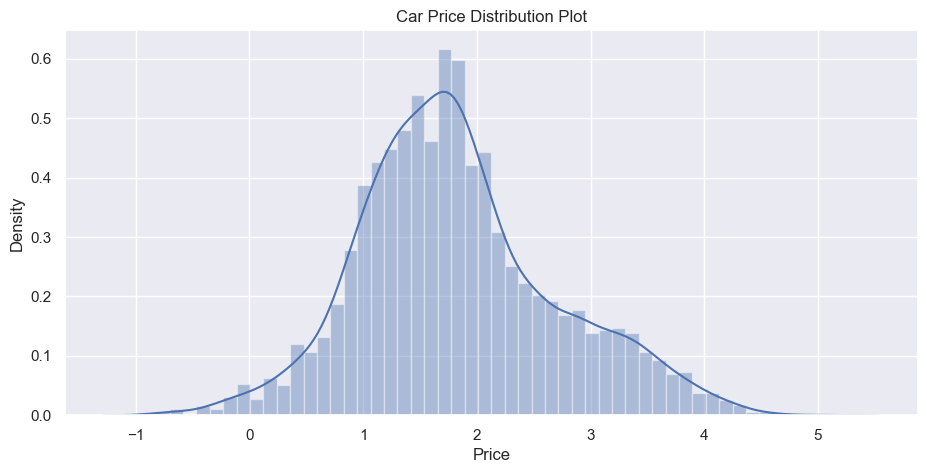

In [92]:
sns.set()
plt.figure(figsize=[11,5])
sns.distplot(df['Price'])
plt.title('Car Price Distribution Plot')

### Transmission column.

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


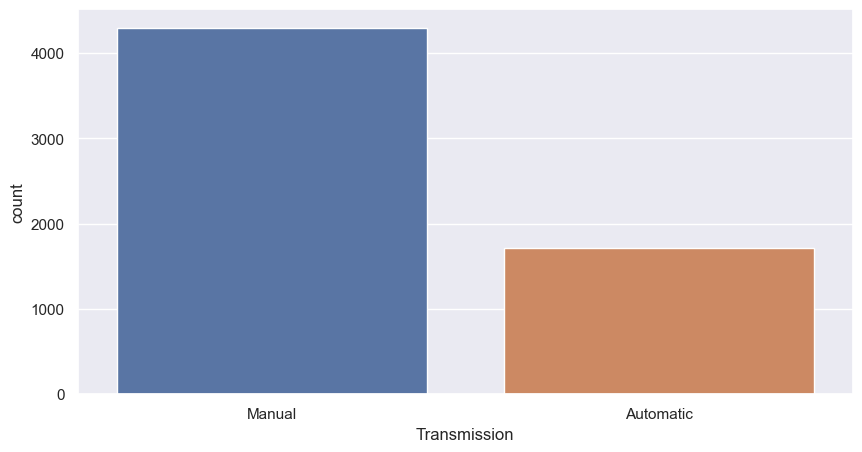

In [93]:
sns.set()
plt.figure(figsize = (10, 5))
sns.countplot(df['Transmission'])
plt.show()

### Fuel_Type column

In [94]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


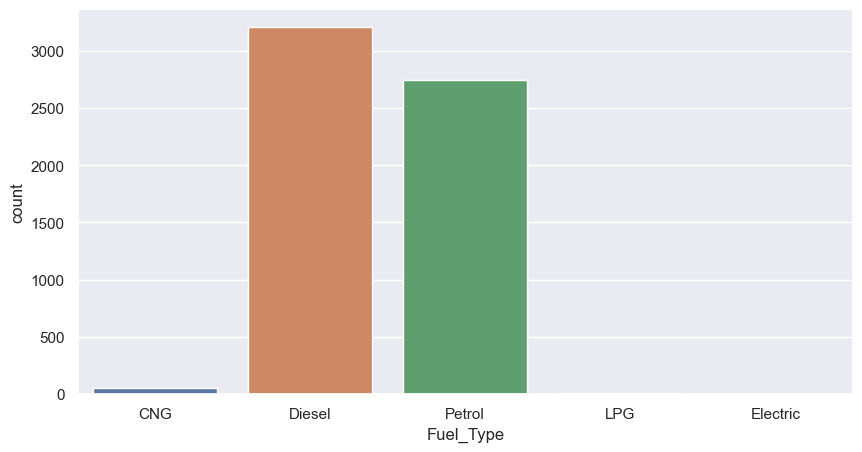

In [95]:
sns.set()
plt.figure(figsize = (10, 5))
sns.countplot(df['Fuel_Type'])
plt.show()

### Owner_Type column.

In [96]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


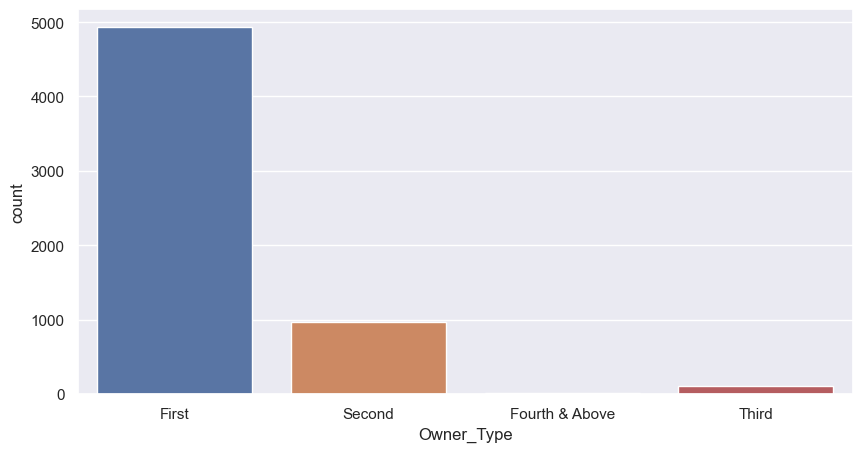

In [97]:
sns.set()
plt.figure(figsize = (10, 5))
sns.countplot(df['Owner_Type'])
plt.show()

### correlation 

<AxesSubplot:>

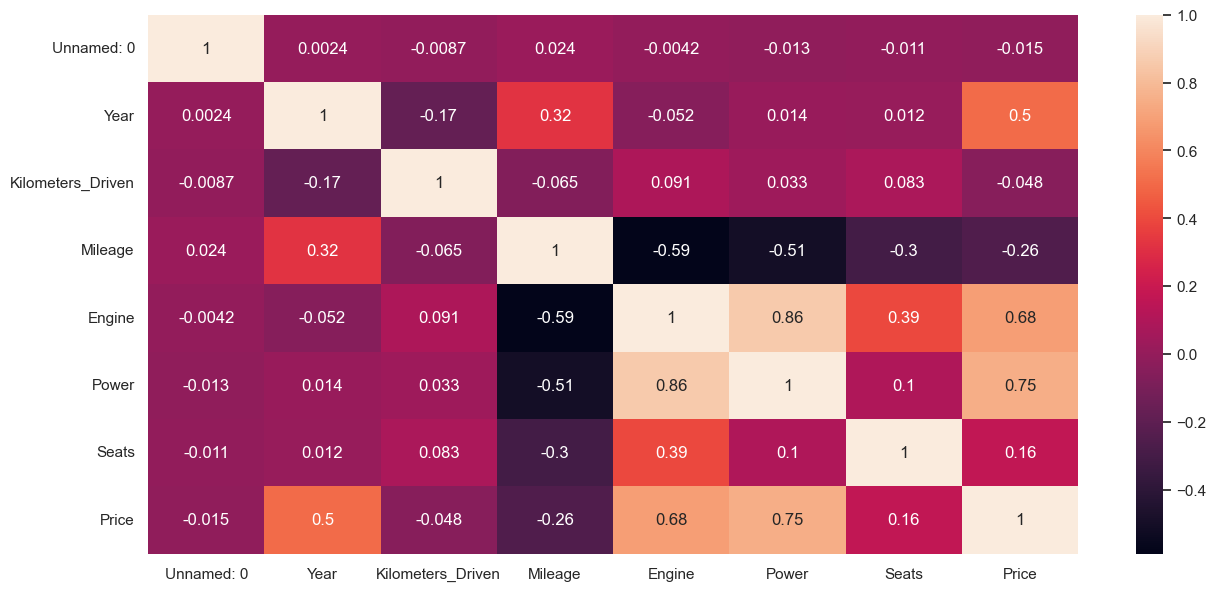

In [98]:
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot=True)

### Spliting data in to training data and testing data

In [99]:
x = df.drop(columns = 'Price', axis = 1)
x = x.drop(columns = 'Unnamed: 0', axis = 1) 
x.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
498,Maruti SX4 ZXI MT BSIV,Kochi,2013,66012,Petrol,Manual,First,15.5,1586.0,103.30,5.0
4459,Maruti Celerio VXI AT,Pune,2015,50000,Petrol,Automatic,First,23.1,998.0,67.04,5.0
3763,Mahindra Xylo E4,Pune,2009,70000,Diesel,Manual,First,14.0,2498.0,112.00,7.0
5966,Maruti Wagon R VXI BS IV,Hyderabad,2018,1048,Petrol,Manual,First,18.9,998.0,67.10,5.0
908,Maruti Swift Dzire VXI,Bangalore,2013,38623,Petrol,Manual,First,19.1,1197.0,85.80,5.0


In [100]:
y = df['Price']
y.sample(5)

3022    3.157000
390     1.536867
1422    0.896088
5156    1.749200
1129    2.163323
Name: Price, dtype: float64

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 6)

In [102]:
lr = LinearRegression()